<a href="https://colab.research.google.com/github/Erick2621/pdsei-2023-erick-alonso/blob/LABORATORIO1/Laboratorio_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Librerías

In [ ]:
import numpy as np                  ## Se usa para el manejo de arrays
import matplotlib.pyplot as plt     ## Se usa para visualizar gráficos
plt.style.use(['dark_background'])  ## Se usa para gráficas de temas oscuros

In [ ]:
##!wget -nc https://github.com/Erick2621/pdsei-2023-erick-alonso/blob/main/Lab1/pajaro.wav
!wget -nc pajaro.wav
!pip install pysoundfile
!pip install bitstring

File ‘pajaro.wav’ already there; not retrieving.



In [ ]:
import IPython
IPython.display.Audio('pajaro.wav')

Tasa de muestreo: 44100 muestreo/segundo
Tamaño de señal: 44100 muestras
Duración: 1.000 segundos


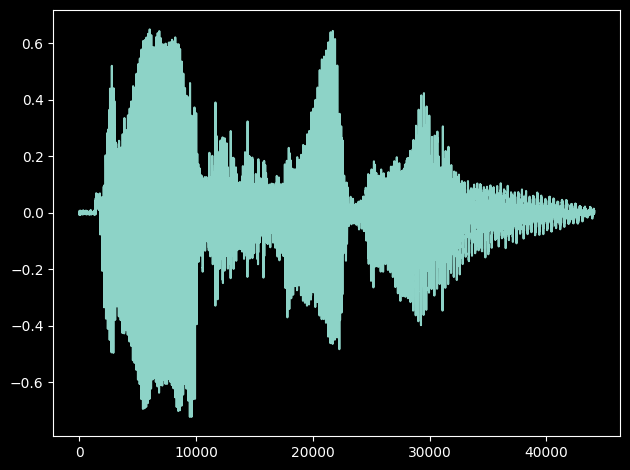

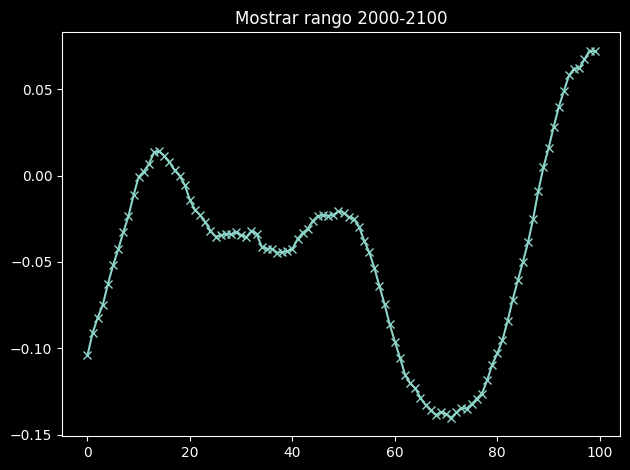

In [ ]:
import soundfile

audio_signal, fm = soundfile.read('pajaro.wav')
audio_izquierdo=audio_signal[:, 0]
type(audio_signal)

print('Tasa de muestreo: {} muestreo/segundo'.format(fm))
print('Tamaño de señal: {} muestras'.format(audio_izquierdo.shape[0]))
print('Duración: {:.3f} segundos'.format(audio_izquierdo.shape[0] / fm))
plt.plot(audio_izquierdo)
plt.tight_layout()
plt.figure()
plt.plot(audio_izquierdo[2000:2100], marker='x')
plt.title('Mostrar rango 2000-2100')
plt.tight_layout()

### **a) Filtro media movil**

In [ ]:
t = np.arange(0,1,1/fm) # Vector tiempo.
n = len(t) #Longitud total de la señal.

sen_filtrada = np.zeros_like(audio_izquierdo) #Inicializamos el vector de salida, con el mismo tamaño que la señal creada.
k = 50 #La ventana u orden del filtro es 2*K+1 = 101.

for i in range(k,n-k-1): #Los indices no tienen que salir del rango de la señal.
    sen_filtrada[i] = np.mean (audio_izquierdo[i-k:i+k]) #Cada salida del filtro es el promedio de la ventana.
tam_ventana = 1000*(k*2+1) / fm # Se calcula el tamaño de la ventana en milisegundos.
print(fm)
print(n)

44100
44100


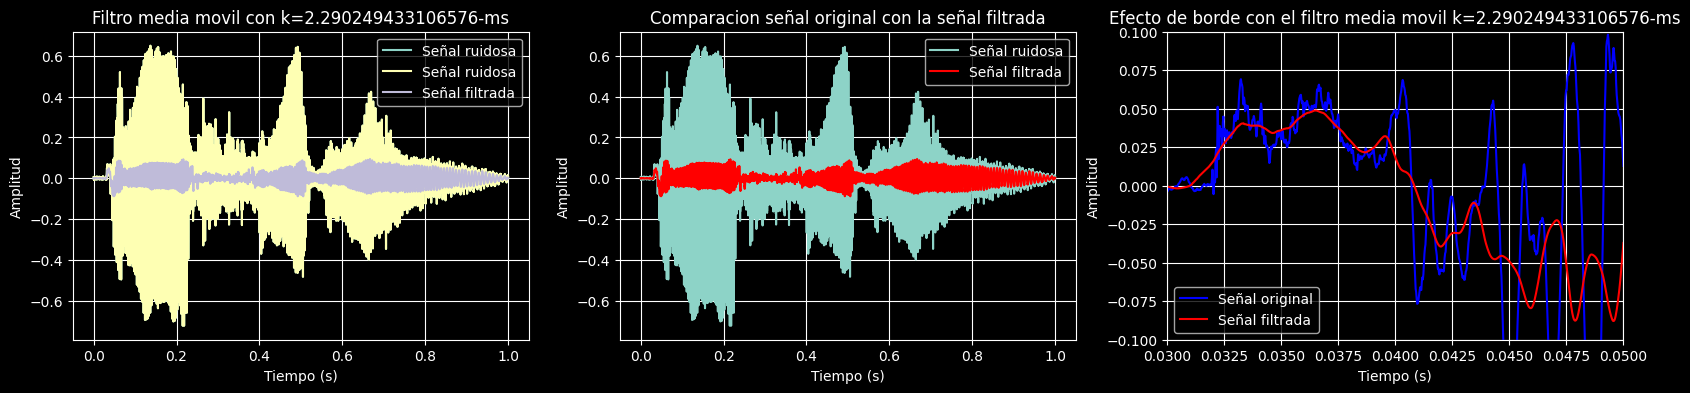

In [ ]:
plt.subplots(1,3, figsize=(20, 4))

plt.subplot(131)
plt.plot(t, audio_signal, label="Señal ruidosa")
plt.plot(t,sen_filtrada, label="Señal filtrada")
plt.title(f"Filtro media movil con k={tam_ventana}-ms")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

plt.subplot(132)
plt.plot(t,audio_izquierdo, label="Señal ruidosa")
plt.plot(t, sen_filtrada, "r",label="Señal filtrada")
plt.title(f"Comparacion señal original con la señal filtrada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

plt.subplot(133)
plt.plot(t, audio_izquierdo, "b", label="Señal original")
plt.plot(t, sen_filtrada, "r", label="Señal filtrada")
plt.title(f"Efecto de borde con el filtro media movil k={tam_ventana}-ms")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.axis([0.03, 0.05, -0.1, 0.1])
plt.grid()
plt.legend()

plt.show()

In [ ]:
soundfile.write('pajaro_original.wav', audio_signal, fm)
soundfile.write('pajaro_filtrado.wav', sen_filtrada, fm)
IPython.display.Audio('maullido_gato_original.wav')

In [ ]:
IPython.display.Audio('maullido_gato_filtrado.wav')

### **b) Filtro Gaussiano**

* **Creación del filtro gaussiano:**

In [ ]:
FWHM = 25 # Establecemos un FWHM teórico de 25 ms.

k = 100 #Valor para establecer el tamaño de la ventana gaussiana 2*k = 200.
gt = 1000*np.arange(-k,k)/fm # tiempo normalizado de la función gaussiana en ms.

filtro_gaussiano = np.exp(-(4*np.log(2)*gt**2) / FWHM**2) #Creacion del filtro gaussiano.
filtro_gaussiano_normalizado = filtro_gaussiano / np.sum (filtro_gaussiano) #Normalizado de la ganancia a 1

# Calculo empirico del tamaño de FWHM en ms
ind_flanco_bajada = k + np.argmin( (filtro_gaussiano[k:]-.5)**2 ) #Indice de la mitad del flanco de subida.
ind_flanco_subida = np.argmin( (filtro_gaussiano-.5)**2 ) #Indice de la mitad del flanco de subida.

FWHM_calculado = gt[ind_flanco_subida] - gt[ind_flanco_bajada] #Duracion del FWHM en ms

sen_filtrada_gauss = np. zeros_like(audio_signal)

#El orden del filtro es *K = 200
for i in range(k+1,n-k-1): #Los indices no tienen que salir del rango de la señal.
    sen_filtrada_gauss[i] = np.sum(audio_izquierdo[i-k:i+k]*filtro_gaussiano_normalizado) #Cada salida es ponderado

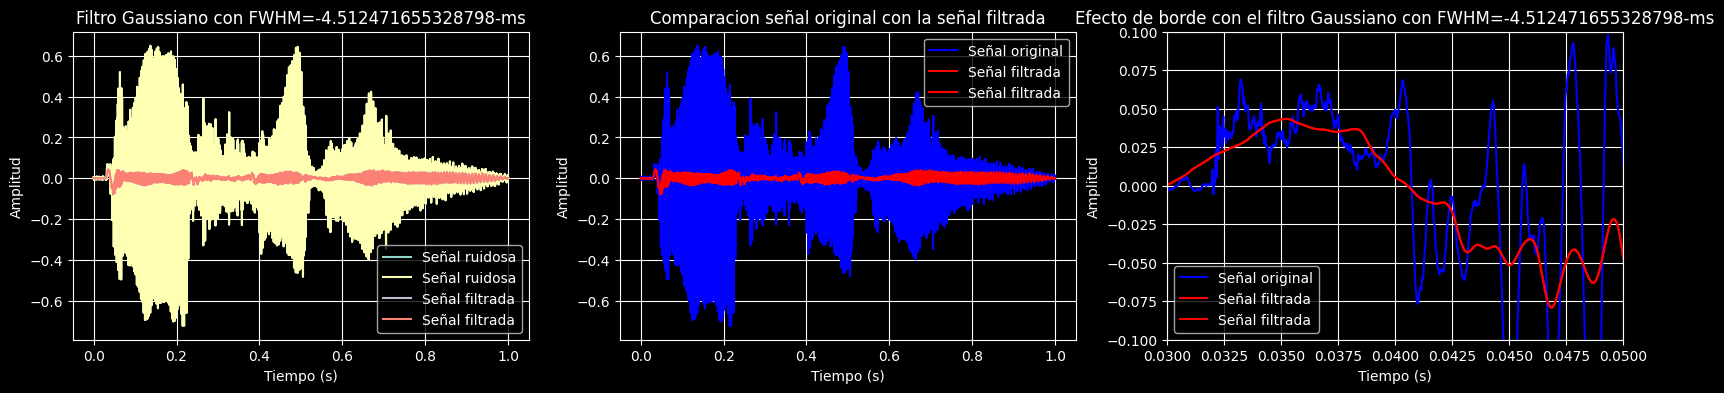

In [ ]:
plt.subplots(1,3, figsize=(20, 4))

plt.subplot(131)
plt.plot(t,audio_signal,label="Señal ruidosa")
plt.plot(t,sen_filtrada_gauss, label="Señal filtrada")
plt.title(f"Filtro Gaussiano con FWHM={FWHM_calculado}-ms")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

plt.subplot(132)
plt.plot(t, audio_izquierdo, "b", label="Señal original")
plt.plot(t, sen_filtrada_gauss, "r",label="Señal filtrada")
plt.title(f"Comparacion señal original con la señal filtrada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.legend()

plt.subplot(133)
plt.plot(t, audio_izquierdo, "b", label="Señal original")
plt.plot(t, sen_filtrada_gauss, "r", label="Señal filtrada")
plt.title(f"Efecto de borde con el filtro Gaussiano con FWHM={FWHM_calculado}-ms")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.axis([0.03, 0.05, -0.1, 0.1])
plt.grid()
plt.legend()

plt.show()

In [ ]:
soundfile.write('pajaro_original.wav', audio_signal, fm)
soundfile.write('pajaro_filtrado_gauss.wav', sen_filtrada_gauss, fm)
IPython.display.Audio('pajaro_filtrado_gauss.wav')